In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv("C://Users/user/Downloads/data science/ML.Algorithams/Decision Tree/Ensemble Techniques , Random Forest, bagging/train1.csv")
data.head()

,Gender,Married,Dependents,Education,Self employed,Applicant income,Co applicant income,loan_amount,loan_amount term,credit_history,property_area,loan_status
0,1,0,0,1,0,5849,0.0,0,360,1,1,1
1,1,1,1,1,0,4583,1508.0,128,360,1,0,0
2,1,1,0,1,1,3000,0.0,66,360,1,1,1
3,1,1,0,0,0,2583,2358.0,120,360,1,1,1
4,1,0,0,1,0,6000,0.0,141,360,1,1,1


In [15]:
data.describe()

,Gender,Married,Dependents,Education,Self employed,Applicant income,Co applicant income,loan_amount,loan_amount term,credit_history,property_area,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.796417,0.648208,0.744300,0.781759,0.133550,5403.459283,1621.245798,141.166124,334.201954,0.773616,1.087948,0.687296
std,0.402991,0.477919,1.009623,0.413389,0.340446,6109.041673,2926.248369,88.340630,82.183884,0.418832,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                 614 non-null int64
Married                614 non-null int64
Dependents             614 non-null int64
Education              614 non-null int64
Self employed          614 non-null int64
Applicant income       614 non-null int64
Co applicant income    614 non-null float64
loan_amount            614 non-null int64
loan_amount term       614 non-null int64
credit_history         614 non-null int64
property_area          614 non-null int64
loan_status            614 non-null int64
dtypes: float64(1), int64(11)
memory usage: 57.7 KB


In [17]:
col=data.columns
col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self employed',
       'Applicant income', 'Co applicant income', 'loan_amount',
       'loan_amount term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

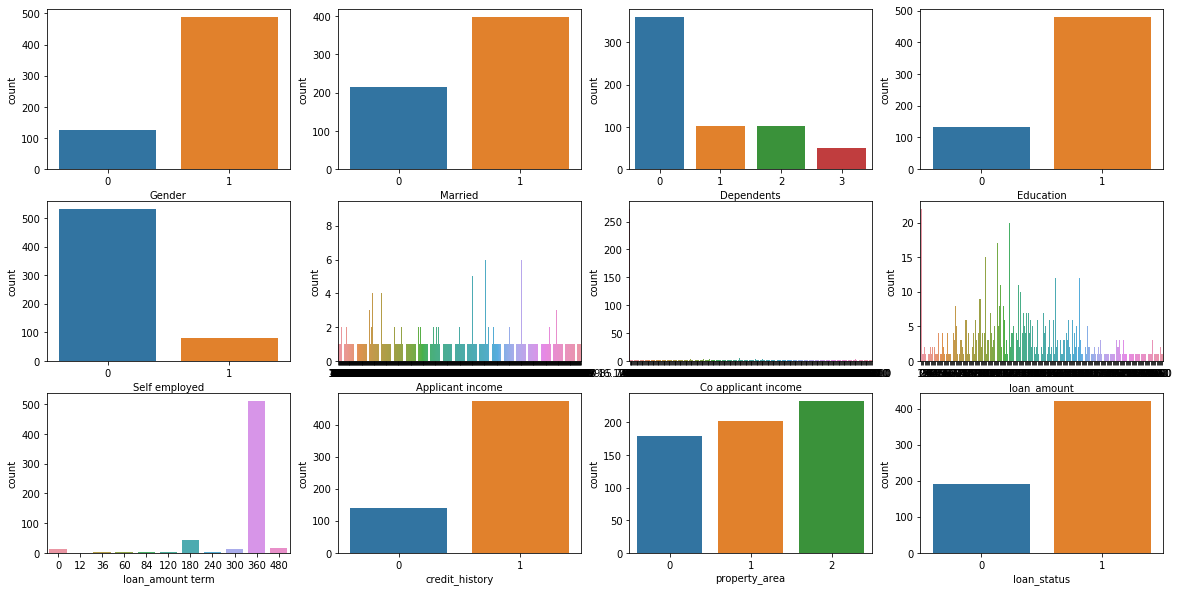

In [18]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for var, subplot in zip(col, ax.flatten()):
    sns.countplot(data[var], ax=subplot)

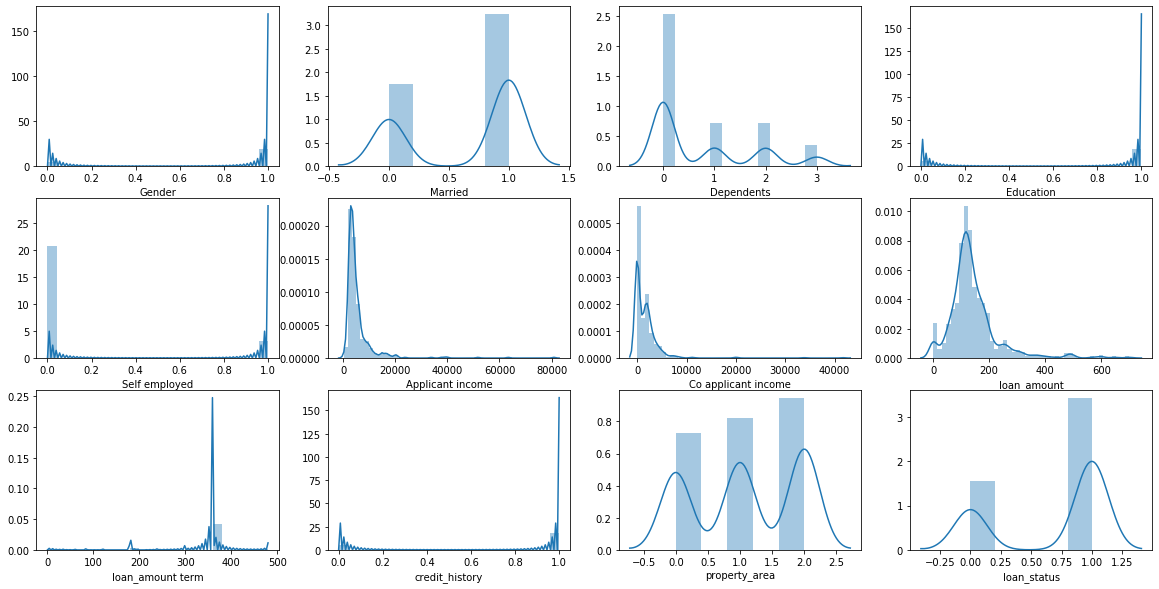

In [19]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for var, subplot in zip(col, ax.flatten()):
    sns.distplot(data[var], ax=subplot)

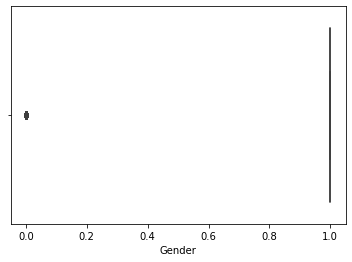

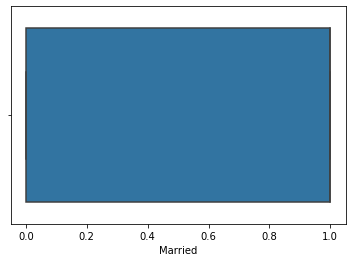

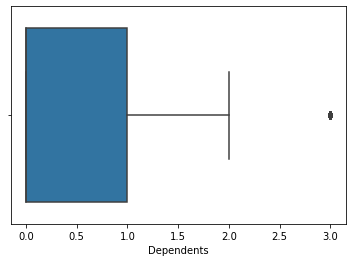

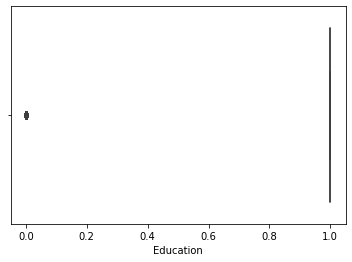

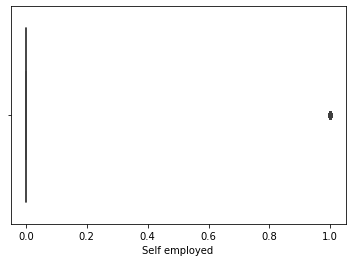

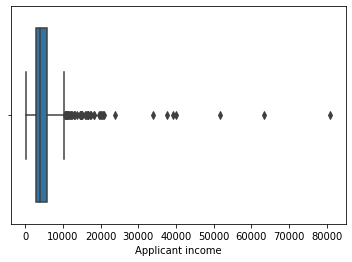

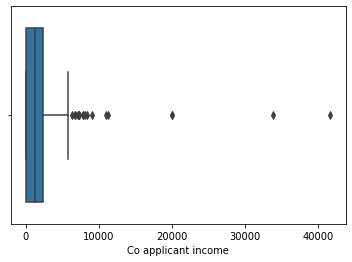

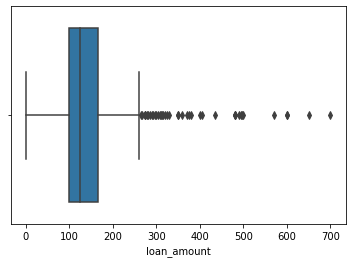

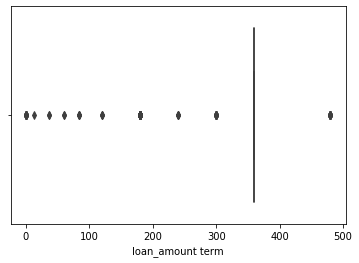

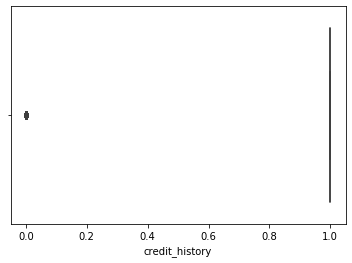

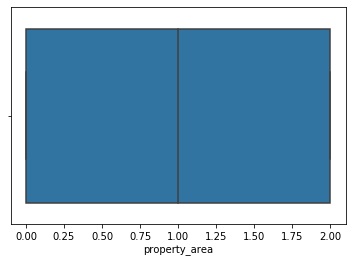

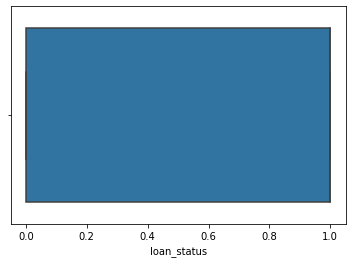

In [22]:
labels=['Gender', 'Married', 'Dependents', 'Education', 'Self employed',
       'Applicant income', 'Co applicant income', 'loan_amount',
       'loan_amount term', 'credit_history', 'property_area', 'loan_status']
for i in range(len(labels)):
    plt.figure()
    sns.boxplot(x=data[labels[i]])
    plt.xlabel(labels[i])

In [23]:
data.loan_status.value_counts()

1    422
0    192
Name: loan_status, dtype: int64

In [24]:
data.loan_amount.value_counts()

0      22
120    20
110    17
100    15
187    12
       ..
240     1
239     1
236     1
234     1
700     1
Name: loan_amount, Length: 204, dtype: int64

In [34]:
data['loan_amount'] = data['loan_amount'].replace(0,np.nan)

In [36]:
data.isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self employed           0
Applicant income        0
Co applicant income     0
loan_amount            22
loan_amount term        0
credit_history          0
property_area           0
loan_status             0
dtype: int64

In [37]:
#mean loan_amount
print('mean of loan_amount is %2.f' %(data['loan_amount'].mean(skipna=True)))

mean of loan_amount is 146


In [38]:
newdata=data.copy()
newdata['loan_amount'].fillna(data['loan_amount'].mean(skipna=True),inplace=True)

In [39]:
newdata.loan_amount.value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: loan_amount, Length: 204, dtype: int64

In [40]:
newdata.shape

(614, 12)

In [41]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender                 614 non-null int64
Married                614 non-null int64
Dependents             614 non-null int64
Education              614 non-null int64
Self employed          614 non-null int64
Applicant income       614 non-null int64
Co applicant income    614 non-null float64
loan_amount            614 non-null float64
loan_amount term       614 non-null int64
credit_history         614 non-null int64
property_area          614 non-null int64
loan_status            614 non-null int64
dtypes: float64(2), int64(10)
memory usage: 57.7 KB


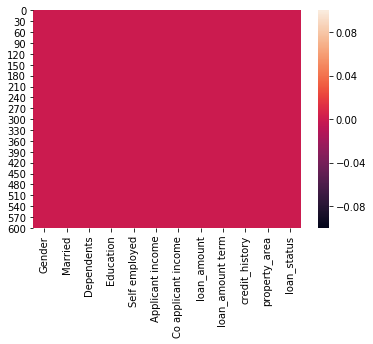

In [55]:
sns.heatmap(newdata.isnull())

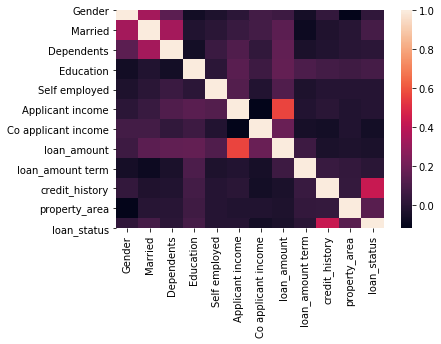

In [44]:
sns.heatmap(newdata.corr())

In [46]:
x=newdata.drop('loan_status',1)
y=newdata['loan_status']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=6)

# # LOGISTIC REGRESSION

In [47]:
from sklearn.linear_model import LogisticRegression
model11=LogisticRegression(max_iter=200,solver='newton-cg')

In [49]:
model11.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred=model11.predict(X_test)

In [51]:
model11.score(X_train,y_train)

0.7622377622377622

In [52]:
model11.score(X_test,y_test)

0.7837837837837838

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [57]:
accuracy_score(y_pred,y_test)

0.7837837837837838

In [58]:
confusion_matrix(y_test,y_pred)

array([[ 28,  29],
       [ 11, 117]], dtype=int64)

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.49      0.72      0.58        39
           1       0.91      0.80      0.85       146

    accuracy                           0.78       185
   macro avg       0.70      0.76      0.72       185
weighted avg       0.82      0.78      0.80       185



# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
k=np.arange(1,20)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)
    print('train accuracy is:',train_accuracy[i])
    print('test accuracy is:',test_accuracy[i])
    print('\n')

train accuracy is: 1.0
test accuracy is: 0.6108108108108108


train accuracy is: 0.7785547785547785
test accuracy is: 0.5405405405405406


train accuracy is: 0.7389277389277389
test accuracy is: 0.6162162162162163


train accuracy is: 0.7156177156177156
test accuracy is: 0.5891891891891892


train accuracy is: 0.7482517482517482
test accuracy is: 0.6324324324324324


train accuracy is: 0.7272727272727273
test accuracy is: 0.5837837837837838


train accuracy is: 0.7202797202797203
test accuracy is: 0.6594594594594595


train accuracy is: 0.7062937062937062
test accuracy is: 0.6324324324324324


train accuracy is: 0.703962703962704
test accuracy is: 0.654054054054054


train accuracy is: 0.6993006993006993
test accuracy is: 0.6162162162162163


train accuracy is: 0.7016317016317016
test accuracy is: 0.654054054054054


train accuracy is: 0.6923076923076923
test accuracy is: 0.6486486486486487


train accuracy is: 0.6899766899766899
test accuracy is: 0.6702702702702703


train accuracy is

In [62]:
k=np.arange(1,20)
idx=np.where(test_accuracy==max(test_accuracy))
x=k[idx]
x

array([19])

In [63]:
model1=KNeighborsClassifier(n_neighbors=x[0],p=2)
model1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [64]:
pred1=model1.predict(X_test)

In [65]:
model1.score(X_train,y_train)

0.6923076923076923

In [66]:
model1.score(X_test,y_test)

0.7081081081081081

In [67]:
confusion_matrix(pred1,y_test)

array([[  5,   2],
       [ 52, 126]], dtype=int64)

In [68]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.71      0.09      0.16        57
           1       0.71      0.98      0.82       128

    accuracy                           0.71       185
   macro avg       0.71      0.54      0.49       185
weighted avg       0.71      0.71      0.62       185



# # NAIVE-BAYES

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred=gnb.predict(X_test)

In [71]:
gnb.score(X_test,y_test)

0.7621621621621621

In [72]:
gnb.score(X_train,y_train)

0.752913752913753

In [73]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.47      0.66      0.55        41
           1       0.89      0.79      0.84       144

    accuracy                           0.76       185
   macro avg       0.68      0.73      0.69       185
weighted avg       0.80      0.76      0.77       185



# DECISION TREE

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [77]:
model.score(X_test,y_test)

0.6270270270270271

In [78]:
model.score(X_train,y_train)

1.0

In [79]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39        56
           1       0.73      0.73      0.73       129

    accuracy                           0.63       185
   macro avg       0.56      0.56      0.56       185
weighted avg       0.63      0.63      0.63       185



# RANDOM FOREST

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model2=RandomForestClassifier(n_estimators=400,bootstrap=True)
model2.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
predict=model2.predict(X_test)
predict

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [85]:
model2.score(X_train,y_train)

1.0

In [86]:
model2.score(X_test,y_test)

0.7567567567567568

In [87]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.40      0.68      0.51        34
           1       0.91      0.77      0.84       151

    accuracy                           0.76       185
   macro avg       0.66      0.73      0.67       185
weighted avg       0.82      0.76      0.78       185



# # BAGGING

In [88]:
from sklearn.ensemble import BaggingClassifier

In [90]:
model3=BaggingClassifier(n_estimators=200,max_samples=0.5)

In [91]:
model3.fit(X_train,y_train)
model3

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.5, n_estimators=200,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [92]:
predi=model3.predict(X_test)

In [93]:
model3.score(X_train,y_train)

0.9440559440559441

In [94]:
model3.score(X_test,y_test)

0.7675675675675676

In [95]:
print(classification_report(predi,y_test))

              precision    recall  f1-score   support

           0       0.46      0.68      0.55        38
           1       0.91      0.79      0.84       147

    accuracy                           0.77       185
   macro avg       0.68      0.74      0.70       185
weighted avg       0.81      0.77      0.78       185



## STRATIFIED K-FOLD

In [96]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [97]:
rfecv = RFECV(estimator=model11, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=200,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='newton-cg', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [98]:
predd=rfecv.predict(X_test)

In [99]:
predd

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [100]:
rfecv.score(X_train,y_train)

0.7668997668997669

In [101]:
rfecv.score(X_test,y_test)

0.7837837837837838

In [102]:
confusion_matrix(predd,y_test)

array([[ 28,  11],
       [ 29, 117]], dtype=int64)

In [103]:
print(classification_report(predd,y_test))

              precision    recall  f1-score   support

           0       0.49      0.72      0.58        39
           1       0.91      0.80      0.85       146

    accuracy                           0.78       185
   macro avg       0.70      0.76      0.72       185
weighted avg       0.82      0.78      0.80       185



RESULT(Accuracy score):-
    
1.LOGISTIC REGRESSION = 78%
2.KNN                 = 71%
3.NAIVE-BAYES         = 76%
4.DECISION TREE       = 63%
5.RANDOM FOREST       = 76%
6.BAGGING             = 77%
7.STRATIFIED K-FOLD   = 78%